# MSV / SS 2023 - Übung 6

## Tensorflow und Keras

- ``Tensorflow`` ist Open-Source-Framework für maschinelles Lernen und künstliche Intelligenz von Google
- ``Keras`` ist eine einsteiger- und nutzerfreundliche Open-Source Deep-Learning-Bibliothek 
- Bitte installieren Sie  * ``tensorflow`` und ``keras`` mit (``pip install tensorflow``)
- Buchempfehlungen: 
    - François Chollet, "Deep Learning with Python"
    - Aurelien Geron, "Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow"


#### Colaboratory

- Wenn Ihr Rechner sehr langsam ist, können Sie auch web-basiert mit "Colaboratory" (Colab https://colab.research.google.com ) arbeiten (Google)
- Auf Colab finden Sie ein Environment für Jupyter notebooks wo Sie Jupyter Notebooks unter Ihrem Google-Konto laufen lassen können
- Colab ist voll integriert mit Google Drive (ähnlich wie die Googledocs) und braucht Zugang zu Google Drive

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### AND und OR mit einem Perceptron

#### (1) Activation Function

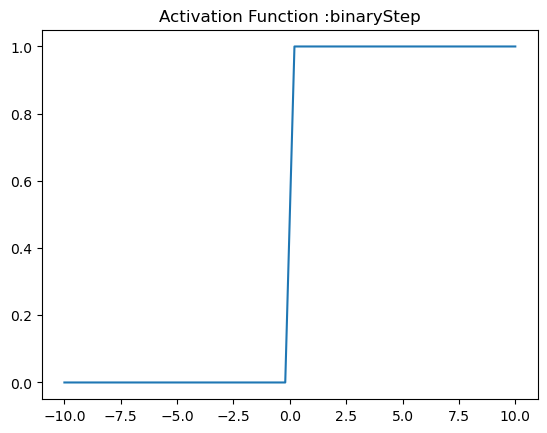

In [2]:
def step(z):
    if z > 0: return 1
    else: return 0
    
step_vectorized = np.vectorize(step)
x = np.linspace(-10, 10)
plt.plot(x, step_vectorized(x))
plt.axis('tight')
plt.title('Activation Function :binaryStep')
plt.show()

#### Perceptron

In [6]:
def perceptron(x_vect,w_vect,w_bias):
    
    activation = np.dot(x_vect, w_vect) + (1 * w_bias)
    y = step(activation)
    
    return y

#### AND

<img src="AND_Perceptron.png" width="200" />

In [7]:
and_weighs = [1, 1]
bias_weigh = -1

test = [[0, 0],[0, 1],[1, 0],[1, 1]]

for x in test:       
    y = perceptron(x,and_weighs,bias_weigh)
    print(x[0], x[1],": ",y)

0 0 :  0
0 1 :  0
1 0 :  0
1 1 :  1


#### OR

<img src="OR_Perceptron.png" width="200" />

In [8]:
or_weighs = [1, 1]
bias_weigh = 0

test = [[0, 0],[0, 1],[1, 0],[1, 1]]

for x in test:       
    y = perceptron(x,or_weighs,bias_weigh)
    print(x[0], x[1],": ",y)

0 0 :  0
0 1 :  1
1 0 :  1
1 1 :  1


#### XOR mit einer Feedforward Netze

#### RELU

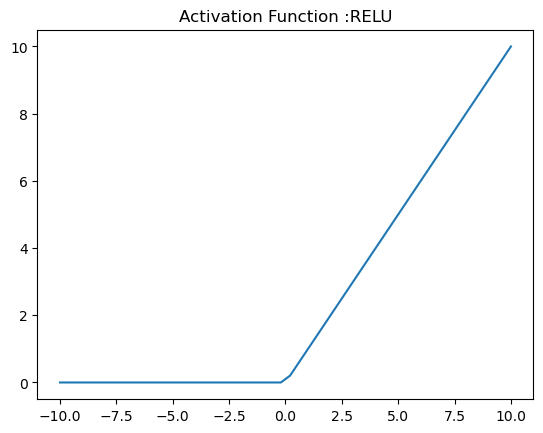

In [11]:
def ReLU(z):
    y = np.maximum(z, 0)
    return y

x = np.unique(np.linspace(-10, 10))
plt.plot(x, ReLU(x))
plt.axis('tight')
plt.title('Activation Function :RELU')
plt.show()

#### Perceptron mit RELU

In [13]:
def perceptron(x_vect,w_vect):    # bias as x_0 node
    activation = np.dot(x_vect, w_vect)
    y = ReLU(activation)
    return y

#### mehrschichtige Netzwerke

In [ ]:
def FNN_2lay(x_vect,parameters):
    
    h1 = perceptron(x_vect + parameters['b1'],parameters['h1_weighs'])
    h2 = perceptron(x_vect + parameters['b1'],parameters['h2_weighs'])
    
    h_layer = [h1,h2] + parameters['b2']

    y = perceptron(h_layer,parameters['output_weighs'])
    
    print("h1:",h1,"; h2:",h2)
    
    return y

<img src="XOR_FFN.png" width="300" />

In [14]:
xor_parameters = {
    "b1": [1],
    "b2": [1],
    "h1_weighs": [1, 1, 0],
    "h2_weighs": [1, 1, -1],
    "output_weighs": [1, -2, 0]
}

test = [[0, 0],[0, 1],[1, 0],[1, 1]]

for x in test:
    
    y = FNN_2lay(x,xor_parameters)
    print(x[0], x[1],": ",y)

h1: 0 ; h2: 0
0 0 :  0
h1: 1 ; h2: 0
0 1 :  1
h1: 1 ; h2: 0
1 0 :  1
h1: 2 ; h2: 1
1 1 :  0


### XOR Lernen mit Keras

https://colab.research.google.com/drive/1_ujiz1PuGK7_GH4so0utZAcfPLGPanSQ?usp=sharing

basiert auf: 
- Hapke, Lane, & Howard "Natural Language Processing in Action", Ch. 5 

## Hausaufgaben

### Übung 6.1

Spezifizieren Sie ein neuronales Netz, mit drei Input- und einem Outputknoten (und beliebigen zusätzlichen Knoten). Die Inputknoten können genau die Werte 0 und 1 annehmen. Der Outputknoten soll genau dann feuern, wenn entweder alle drei oder genau der erste Outputknoten den Wert 1 hat.

Sie können die Lösung entweder manuell finden oder mit Keras.